In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


In [2]:
import geopandas as gpd
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
import geopandas as gpd
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
%matplotlib inline
from sklearn.model_selection import train_test_split                
from sklearn.tree import DecisionTreeClassifier                     
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import classification_report                   
from sklearn import tree   
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import keras

In [4]:
df = pd.read_csv('../input/movies-dataset-for-feature-extracion-prediction/movies.csv')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [7]:
for col in ['GENRE','ONE-LINE','STARS']:
    df[col] = df[col].str.replace("\n","").str.strip()

In [8]:
df['Year'] = df['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')
df['Year'] = df['Year'].str.strip().replace(")","")

def extract_year(year):
    if year[-3:] == '– )':
        return year.replace('– )',"–")
    else:
        return year.replace(')',"")

df['Year'] = df['Year'].fillna('Unknown')
df['Year'] = df['Year'].apply(lambda y: extract_year(y))
df['Year'].isnull().sum()

0

In [9]:
df['GENRE'] = df['GENRE'].fillna('Unknown')

In [10]:
df['RATING'].fillna(int(df['RATING'].mean()), inplace=True)

In [11]:
df['VOTES'] = df['VOTES'].str.replace(',', '')
df['VOTES'] = df['VOTES'].astype(float)
df['VOTES'].fillna((df['VOTES'].mean()), inplace=True)


In [12]:
df['RunTime'].fillna(int(df['RunTime'].mean()), inplace=True)

In [13]:
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '').str.replace('M', '')
df['Gross'] = df['Gross'].astype(float)
df['Gross'].fillna((df['Gross'].mean()), inplace=True)

In [14]:
df.isnull().sum()

MOVIES        0
YEAR        644
GENRE         0
RATING        0
ONE-LINE      0
STARS         0
VOTES         0
RunTime       0
Gross         0
Year          0
dtype: int64

In [15]:
n = df.nunique(axis=0)
print(n)

MOVIES      6817
YEAR         438
GENRE        511
RATING        82
ONE-LINE    8688
STARS       7877
VOTES       4130
RunTime      261
Gross        333
Year         265
dtype: int64


In [16]:
GENRE = pd.Series(df.GENRE.str.split(',').sum()).value_counts()
GENRE = GENRE[GENRE>10]

px.bar(GENRE, y=GENRE.values, x=GENRE.index, color=GENRE.values, title= 'The most watched Genres!', 
    labels={
    'index': 'GENRE',
    'y': 'count'
        })

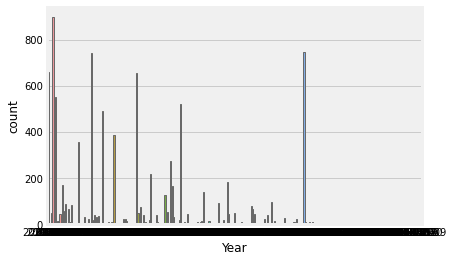

In [17]:
sns.countplot('Year', data=df)
plt.show()

<AxesSubplot:xlabel='RATING', ylabel='Density'>

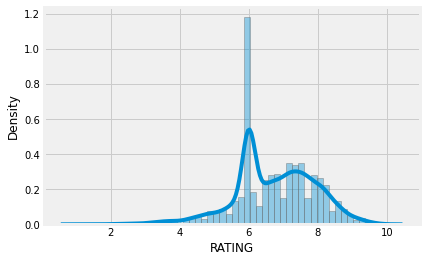

In [18]:
sns.distplot(df["RATING"])

<AxesSubplot:xlabel='RunTime', ylabel='Density'>

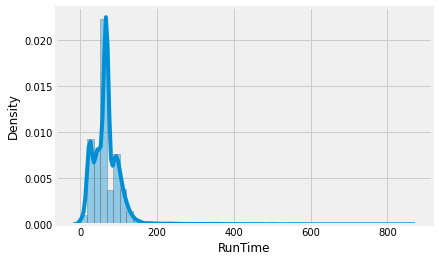

In [19]:
sns.distplot(df["RunTime"])

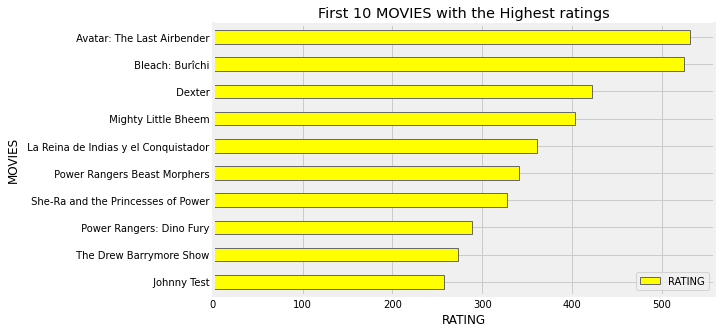

In [20]:
highest_rating = df[['MOVIES','RATING']].groupby('MOVIES').sum().sort_values('RATING', ascending=False)

highest_rating.iloc[:10].plot(kind='barh',color=['yellow', 'orange'])
plt.gcf().set_size_inches(8,5)
plt.title('First 10 MOVIES with the Highest ratings')
plt.gca().invert_yaxis()
plt.xlabel('RATING')
_ = plt.ylabel('MOVIES')

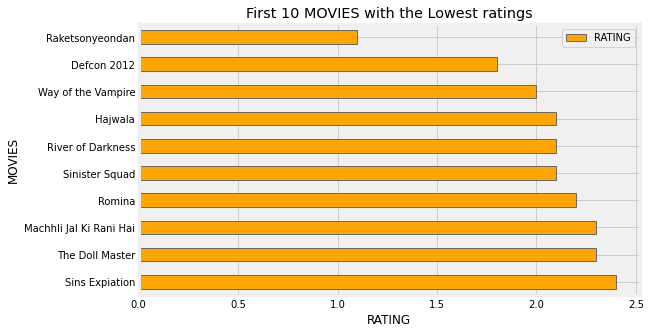

In [21]:
highest_rating = df[['MOVIES','RATING']].groupby('MOVIES').sum().sort_values('RATING', ascending=True)

highest_rating.iloc[:10].plot(kind='barh',color=['orange', 'red'])
plt.gcf().set_size_inches(8,5)
plt.title('First 10 MOVIES with the Lowest ratings')
plt.gca().invert_yaxis()
plt.xlabel('RATING')
_ = plt.ylabel('MOVIES')